In [1]:
from astropy.io import fits
import numpy as np
from astropy.table import Table
#import sys
#sys.path.append('/Users/rociokiman/Documents/Gaia-Cupid/ActivityAgeRelation/banyan_sigma')
#from banyan_sigma import banyan_sigma
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord  
import astropy.units as u
#import random
%matplotlib notebook

In [2]:
literature_search = Table.read('Catalogs/literature_search.fits')
source_ref = Table.read('Catalogs/source_ref.csv')

In [3]:
#Numbers for each reference
source_num_ref = source_ref['source_num']

In [4]:
ra = np.array(literature_search['ra'])
dec = np.array(literature_search['dec'])
ewha = np.array(literature_search['ewha'])
source = np.array(literature_search['source_ref'])
source_num = np.array(literature_search['source_num'])

In [5]:
#Define number id that helps identify each star
extra_id = np.arange(len(literature_search['ra']))
#Sort according to ra
idx_sorted = np.argsort(literature_search['ra'])
ra_sorted = np.array(literature_search['ra'][idx_sorted])
dec_sorted = np.array(literature_search['dec'][idx_sorted])
#index to sent arrays to original state
idx = np.argsort(extra_id[idx_sorted])

In [6]:
#Defines an array that is going to indicate which stars are the same. 
#Having the same number in same_star_sorted means they are the same star.
same_star_sorted = np.zeros(len(ra_sorted))
dummy = 1
for i in range(len(ra_sorted)-1):
    c1 = SkyCoord(ra=ra_sorted[i]*u.deg, dec=dec_sorted[i]*u.deg)
    c2 = SkyCoord(ra=ra_sorted[i+1]*u.deg, dec=dec_sorted[i+1]*u.deg)
    separation = c1.separation(c2).arcsec
    if(separation < 2):
        same_star_sorted[i] = dummy
        same_star_sorted[i+1] = dummy
    else:
        dummy +=1

same_star = same_star_sorted[idx]

In [7]:
N_ref = len(source_num_ref)
matrix_prob = np.ones((N_ref,N_ref))*0

In [8]:
matrix_prob[1,0] = 1

In [9]:
howmany = []
mean,std,delta=[],[],[]
for x in range(1,int(max(same_star_sorted))):
    mask = (same_star == x) * (ewha>0)
    if(len(ewha[mask*~np.isnan(ewha)])>1):
        ### --- Test for the selection of equal stars --- ### 
        #if(20 in source_num[mask]):
        #    print(x)
        #    for ra_i,dec_i,source_i in zip(ra[mask],dec[mask],source[mask]):
        #        print(ra_i,dec_i,source_i)
        ### --- --- ###
        
        howmany.append(len(ewha[mask]))
        mean.append(np.nanmean(ewha[mask]))
        std.append(np.nanstd(ewha[mask]))
        delta.append(np.nanmax(ewha[mask])-np.nanmin(ewha[mask]))
        source_num_mask = source_num[mask]
        N = len(source_num_mask)
        if(np.nanstd(ewha[mask])/np.nanmean(ewha[mask])<0.3):
            for i in range(N):
                for j in range(i,N):
                    matrix_prob[int(source_num_mask[i]),int(source_num_mask[j])]+=1
        
mean,std,delta = np.array(mean),np.array(std),np.array(delta)

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


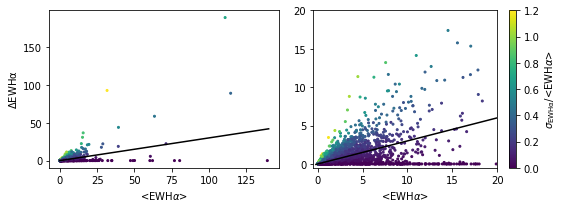

In [17]:
x = np.linspace(-0.2,140)
y = x*0.3
f,(ax1,ax2) = plt.subplots(1,2,figsize=(8,3)) 
cax = ax1.scatter(mean,delta,c=std/mean,s=4,vmin=0,vmax=1.2)
ax1.plot(x,y,'-k',label=r'$\sigma_{\rm EWH\alpha}/<EWH$\alpha>=0.3$')
ax1.set_xlabel(r'<EWH$\alpha$>')
ax1.set_ylabel(r'$\Delta {\rm EWH\alpha}$')

ax2.scatter(mean,delta,c=std/mean,s=4,vmin=0,vmax=1.2)
ax2.plot(x,y,'-k',label=r'$\sigma_{\rm EWH\alpha}/<EWH$\alpha>=0.3$')
ax2.set_xlim(-0.5,20)
ax2.set_ylim(-0.5,20)
ax2.set_xlabel(r'<EWH$\alpha$>')

plt.colorbar(cax,label=r'$\sigma_{\rm EWH\alpha}$/<EWH$\alpha$>')
plt.tight_layout()
plt.show()

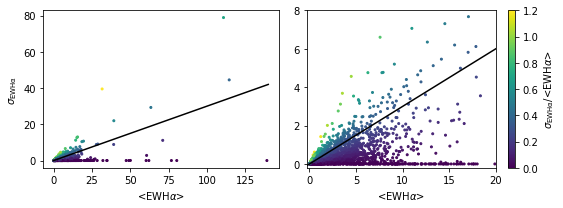

In [15]:
x = np.linspace(-0.2,140)
y = x*0.3
f,(ax1,ax2) = plt.subplots(1,2,figsize=(8,3)) 
cax = ax1.scatter(mean,std,c=std/mean,s=4,vmin=0,vmax=1.2)
ax1.plot(x,y,'-k',label=r'$\sigma_{\rm EWH\alpha}/<EWH$\alpha>=0.3$')
ax1.set_xlabel(r'<EWH$\alpha$>')
ax1.set_ylabel(r'$\sigma_{\rm EWH\alpha}$')

ax2.scatter(mean,std,c=std/mean,s=4,vmin=0,vmax=1.2)
ax2.plot(x,y,'-k',label=r'$\sigma_{\rm EWH\alpha}/<EWH$\alpha>=0.3$')
ax2.set_xlim(-0.3,20)
ax2.set_ylim(-0.2,8)
ax2.set_xlabel(r'<EWH$\alpha$>')

plt.colorbar(cax,label=r'$\sigma_{\rm EWH\alpha}$/<EWH$\alpha$>')
plt.tight_layout()
plt.show()

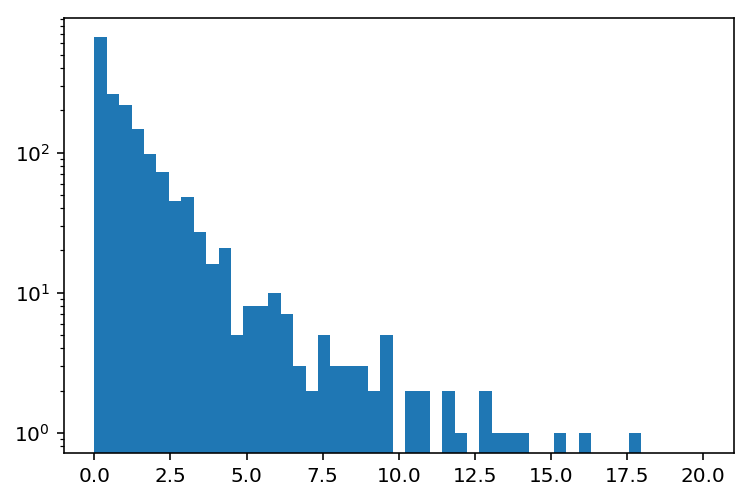

In [41]:
plt.hist(std/mean,bins=np.linspace(0,20))
plt.yscale('log')
plt.show()